Importing necessary libraries

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Loading the Housing dataset using Pandas

In [47]:
data=pd.read_excel("1553768847_housing.xlsx")
data.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
5,-122.25,37.85,52,919,213.0,413,193,4.0368,NEAR BAY,269700
6,-122.25,37.84,52,2535,489.0,1094,514,3.6591,NEAR BAY,299200
7,-122.25,37.84,52,3104,687.0,1157,647,3.1200,NEAR BAY,241400
8,-122.26,37.84,42,2555,665.0,1206,595,2.0804,NEAR BAY,226700
9,-122.25,37.84,52,3549,707.0,1551,714,3.6912,NEAR BAY,261100


Shape of the Dataset

In [49]:
data.shape

(20640, 10)

Descriptive statistics of the Housing Data

In [50]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


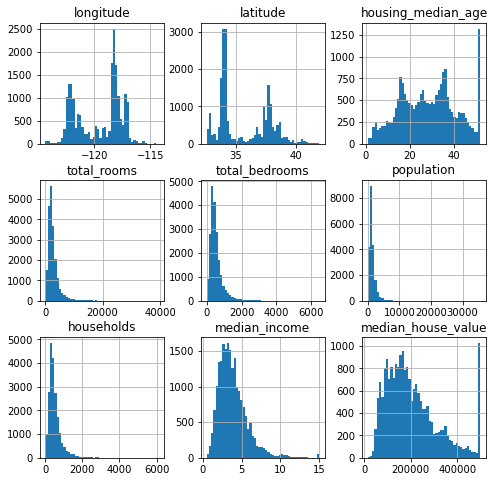

In [72]:
data.hist(figsize=(8,8),bins=50);

<AxesSubplot:>

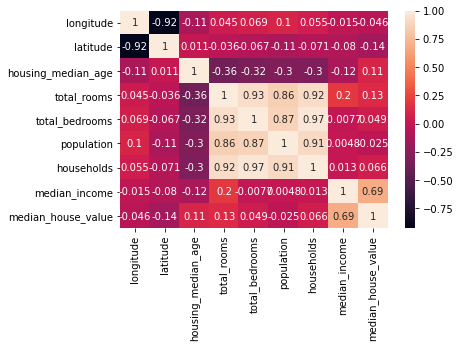

In [129]:
import seaborn as sns
sns.heatmap(data.corr(),annot=True)

Checking for missing values

In [52]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

Count of values for ocean_proximity

In [53]:
data['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

Handling of missing values using SimpleImputer

In [62]:
from sklearn.impute import SimpleImputer

In [64]:
imp=SimpleImputer(missing_values=np.nan,strategy='mean')

In [70]:
data['total_bedrooms']=imp.fit_transform(data[['total_bedrooms']])

In [71]:
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

In [56]:
data.dtypes

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms        float64
population              int64
households              int64
median_income         float64
ocean_proximity        object
median_house_value      int64
dtype: object

Encoding categorical variables using get_dummies from pandas library

In [57]:
dummy=pd.get_dummies(data["ocean_proximity"])


In [58]:
dummy.head()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0


In [59]:
data1=pd.concat([data,dummy],axis=1)

In [77]:
data1.drop("ocean_proximity",axis=1,inplace=True)

Extracting input(X) 

In [81]:
X=data1.drop('median_house_value',axis=1)
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,0,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,0,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,0,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,0,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,0,1,0,0,0
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,0,1,0,0,0
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,0,1,0,0,0
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,0,1,0,0,0


Extracting Output(Y)

In [80]:
y=data['median_house_value']
y

0        452600
1        358500
2        352100
3        341300
4        342200
          ...  
20635     78100
20636     77100
20637     92300
20638     84700
20639     89400
Name: median_house_value, Length: 20640, dtype: int64

Splitting the dataset into Training and Test data

In [83]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(X,y,test_size=0.2)

In [144]:
y_train.shape

(16512,)

In [86]:
y_test.shape

(4128,)

Scaling trained data

In [96]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X1=sc.fit_transform(x_train)

In [102]:
X1.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

Scaling test data

In [112]:
x_test_sc=sc.transform(x_test)

Performing LinearRegression on Training data

In [117]:
from sklearn.linear_model import LinearRegression
le=LinearRegression(fit_intercept=True,copy_X=True,n_jobs=1)
le.fit(X1,y_train)


LinearRegression(n_jobs=1)

R2 for the trained model

In [119]:
le.score(X1,y_train)

0.6478085037022825

In [118]:
le.intercept_

206318.64553052312

In [110]:
le.coef_

array([-54349.00569884, -55129.85091665,  13006.13781862, -10374.04235289,
        32768.31216873, -42157.82768998,  24960.44711239,  73941.50022189,
         6191.59326777, -12406.71008097,   2868.38142609,   2525.04395875,
         5583.02279588])

Predicting output for test dataset

In [123]:
y_pred=le.predict(x_test_sc)

Calculating Root Mean Square Error(RMSE)

In [122]:
from sklearn.metrics import mean_squared_error

In [124]:
mse=mean_squared_error(y_test,y_pred)

In [126]:
import math
math.sqrt(mse)

69710.07824006196

Bonus excercises

Extracting the median_income column from x_train,x_test

In [145]:
x2=x_train.iloc[:,7:8]
x2

,median_income
4677,10.5860
18876,2.2417
16184,0.7714
8920,2.2917
3724,3.1551
...,...
19985,3.1453
6390,8.2004
4120,3.6058
6903,3.7109


In [139]:
x3=x_test.iloc[:,7:8]
x3

,median_income
17886,4.5062
17640,5.0714
11353,3.0625
10932,4.7639
111,2.6429
...,...
11874,3.0250
18160,6.8370
16805,4.4750
12689,5.1385


In [143]:
x_train

(16512,)

Performing LinearRegression and Predicting on Test data

In [148]:
from sklearn.linear_model import LinearRegression
le1=LinearRegression(fit_intercept=True,copy_X=True,n_jobs=1)
le1.fit(x2,y_train)


LinearRegression(n_jobs=1)

In [152]:
y_pred1=le.predict(x3)

In [150]:
import matplotlib.pyplot as plt

Fitted model for training data

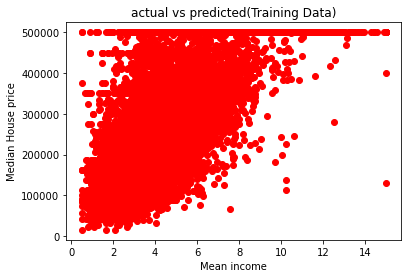

In [159]:
plt.scatter(x2,y_train, color = "red")

plt.title("Actual vs Predicted(Training Data)")
plt.xlabel("Mean income")
plt.ylabel("Median House price")
plt.show()

Fitted model for Test data

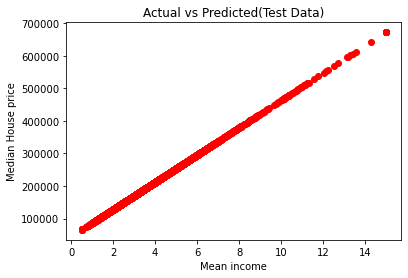

In [160]:
plt.scatter(x3,y_pred1, color = "red")

plt.title("Actual vs Predicted(Test Data)")
plt.xlabel("Mean income")
plt.ylabel("Median House price")
plt.show()

YES,the fitted model satisfies the test data